# Basi

In [51]:
import numpy as np

from scipy import stats

import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 14

Draw **400** samples from a *Gaussian Distribution* with $\mu = 340$ and $3\sigma = 10$

In [52]:
np.random.seed(1234)

In [53]:
sample_size = 400
data = np.random.normal(340., 10/3, sample_size)

Compute **mean**, **variance** and **standard deviation** of samples

In [54]:
μ = np.mean(data)
σ2 = np.var(data, ddof=1) # N - ddof
σ = np.std(data)
print("mean: {0}".format(μ))
print("unbiased variance: {0}".format(σ2))
print("standard deviation: {0}".format(σ))

mean: 340.20059227919336
unbiased variance: 10.479539775749842
standard deviation: 3.233162681695814


Function to compute number of **bins**

In [55]:
def Nbins(nsamples):
    return int(np.ceil(1.87*(nsamples-1)**0.4+1))

Plot data **histogram** and *normplot*

**Fit** data

In [56]:
fit = stats.norm.pdf(sorted(data), μ, σ)

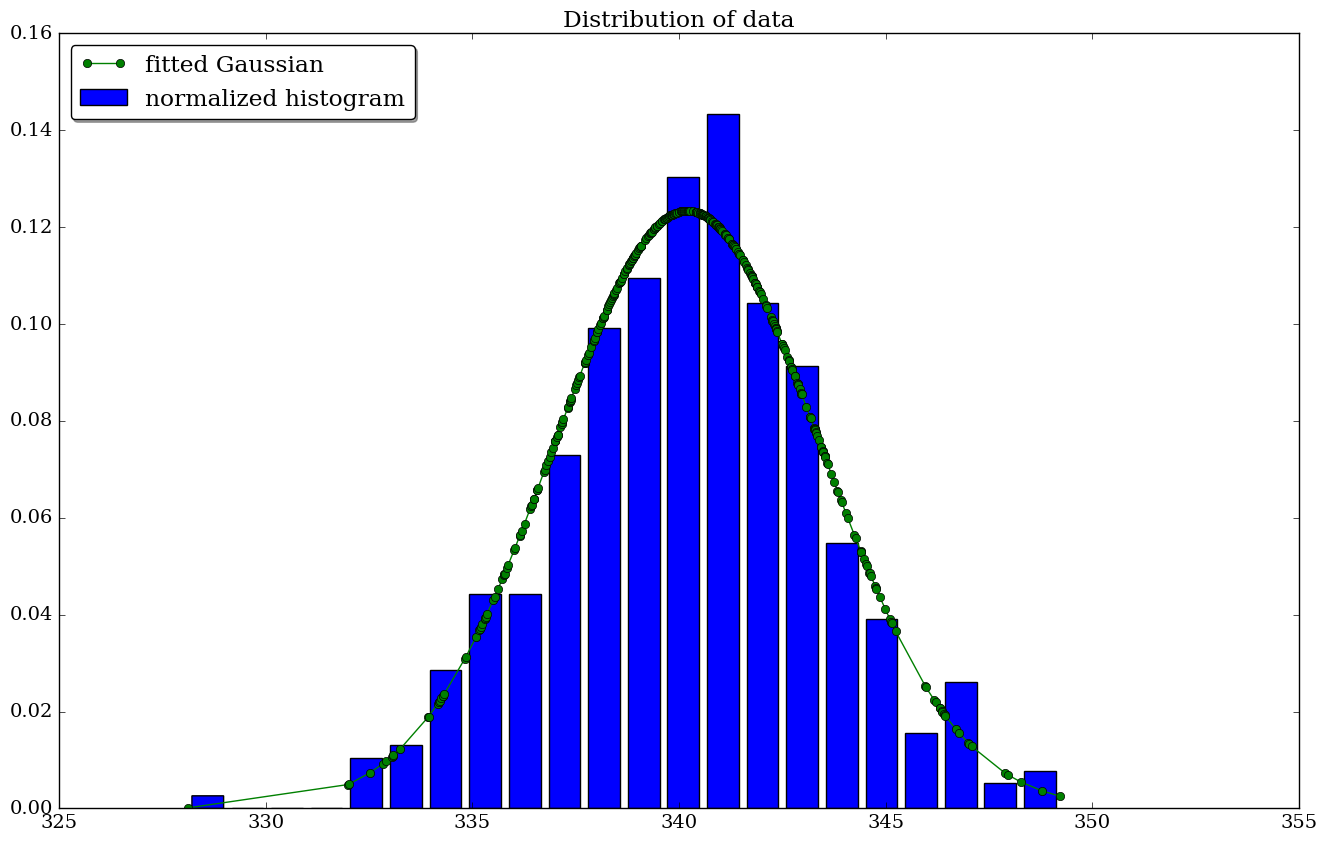

In [57]:
plt.figure(figsize=(16,10), dpi=300)
n, bins, patches = plt.hist(data, Nbins(len(data)), normed=True, histtype='bar', rwidth=0.8, \
                            label='normalized histogram')
plt.plot(sorted(data),fit,'-o',label='fitted Gaussian')
plt.xlim([325,355])
plt.legend(fancybox=True, loc='upper left', shadow=True)
plt.title("Distribution of data");

In [58]:
(quantiles, values), (slope, intercept, r) = stats.probplot(data, dist='norm')

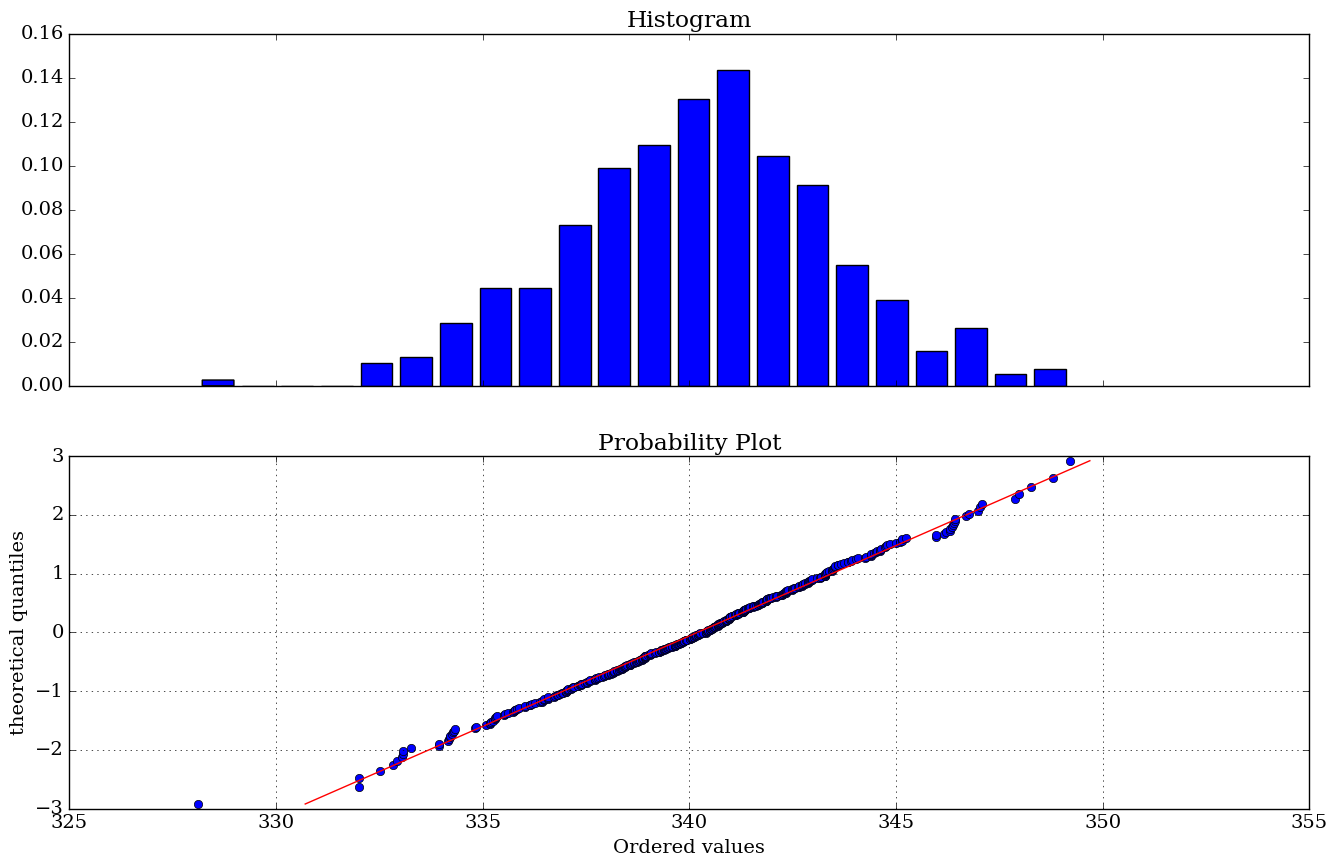

In [59]:
f, axarr = plt.subplots(2, sharex=True,figsize=(16,10), dpi=300)
axarr[0].hist(data, Nbins(len(data)), normed=1, histtype='bar', rwidth=0.8)
axarr[0].set_title('Histogram')
axarr[1].plot(values, quantiles,'ob')
axarr[1].plot(quantiles * slope + intercept, quantiles, 'r')
axarr[1].set_xlabel('Ordered values')
axarr[1].set_ylabel('theoretical quantiles')
axarr[1].set_title('Probability Plot')
plt.grid()
plt.xlim([325,355]);

# Subsampling

The dataset is divided in **blocks** and for each block $\mu$ and $\sigma$ are computed

In [60]:
nblocks = 8
block_size = sample_size // nblocks

In [61]:
v_means = np.zeros((nblocks,1))
v_stds = np.zeros_like(v_means)
v_vars = np.zeros_like(v_means)

In [62]:
for i in range(nblocks):
    act_samples = data[i*block_size:(i+1)*block_size]
    v_means[i] = np.mean(act_samples)
    v_stds[i] = np.std(act_samples)
    v_vars[i] = np.var(act_samples,ddof=1)

In [63]:
mean_μ = np.mean(v_means)
mean_σ = np.mean(v_stds)
mean_σ2 = np.mean(v_vars)

In [64]:
print("dataset average: {0:1.4f}\tmean blocks average: {1:1.4f}".format(μ,mean_μ))
print("dataset std:\t{0:1.4f}\t\tmean blocks std:\t{1:1.4f}".format(σ,mean_σ))
print("dataset variance: {0:1.4f}\tmean blocks variance: {1:1.4f}".format(σ2,mean_σ2))

dataset average: 340.2006	mean blocks average: 340.2006
dataset std:	3.2332		mean blocks std:	3.1945
dataset variance: 10.4795	mean blocks variance: 10.4716


Verify the **standard error** relation:

$$\sigma_{\bar{X}} = \frac{\sigma}{\sqrt{n}}$$

where:
- $\sigma_{\bar{X}}$: standard deviation of the mean
- $\sigma$ : _true standard deviation_
- $n$: size of the sample

In [65]:
np.std(v_means) - σ/np.sqrt(block_size)

-0.019953627662332996